In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df=pd.read_csv('LA-UR-05-7318-failure-data-1996-2005.csv')
df.head()

,System,machine type,nodes,procstot,procsinnode,nodenum,nodenumz,node install,node prod,node decom,...,Prob Started (mm/dd/yy hh:mm),Prob Fixed (mm/dd/yy hh:mm),Down Time,Facilities,Hardware,Human Error,Network,Undetermined,Software,Same Event
0,2,cluster,49.0,6152.0,80.0,0.0,0.0,5-Apr,5-Jun,current,...,6/21/2005 10:54,6/21/2005 11:00,6,NaN,Graphics Accel Hdwr,NaN,NaN,NaN,NaN,No
1,2,cluster,49.0,6152.0,80.0,0.0,0.0,5-Apr,5-Jun,current,...,9/6/2005 9:13,9/6/2005 9:19,6,NaN,NaN,NaN,NaN,NaN,Other Software,No
2,2,cluster,49.0,6152.0,80.0,0.0,0.0,5-Apr,5-Jun,current,...,9/6/2005 10:32,9/6/2005 10:46,14,NaN,NaN,NaN,NaN,Undetermined,NaN,No
3,2,cluster,49.0,6152.0,80.0,0.0,0.0,5-Apr,5-Jun,current,...,9/6/2005 14:50,9/6/2005 15:08,18,NaN,NaN,NaN,NaN,NaN,Other Software,No
4,2,cluster,49.0,6152.0,80.0,0.0,0.0,5-Apr,5-Jun,current,...,9/8/2005 16:52,9/8/2005 16:57,5,NaN,NaN,NaN,NaN,Undetermined,NaN,No


In [26]:
unique_values = df['System'].unique()
print(unique_values,"-->", len(unique_values))

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] --> 23


In [27]:
unique_values = df['nodes'].unique()
print(unique_values,"-->", len(unique_values))

[4.900e+01 1.280e+02 3.200e+01 1.000e+00 1.640e+02 2.560e+02 5.120e+02
 1.600e+01       nan 1.024e+03 5.000e+00] --> 11


In [28]:
df.fillna(method='ffill', inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_7300\3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [29]:
# Check for records with problems detected and fixed
failure_status = df[(df['Prob Started (mm/dd/yy hh:mm)'].notnull()) & (df['Prob Fixed (mm/dd/yy hh:mm)'].notnull())]
print(failure_status)
print(len(failure_status))

       System machine type  nodes  procstot  procsinnode  nodenum  nodenumz  \
0           2      cluster   49.0    6152.0         80.0      0.0       0.0   
1           2      cluster   49.0    6152.0         80.0      0.0       0.0   
2           2      cluster   49.0    6152.0         80.0      0.0       0.0   
3           2      cluster   49.0    6152.0         80.0      0.0       0.0   
4           2      cluster   49.0    6152.0         80.0      0.0       0.0   
...       ...          ...    ...       ...          ...      ...       ...   
23734      24          smp    1.0      32.0         32.0      0.0       0.0   
23735      24          smp    1.0      32.0         32.0      0.0       0.0   
23736      24          smp    1.0      32.0         32.0      0.0       0.0   
23737      24          smp    1.0      32.0         32.0      0.0       0.0   
23738      24          smp    1.0      32.0         32.0      0.0       0.0   

          node install        node prod node decom 

In [30]:
# Further filter based on Down Time
failure_status1 = failure_status[failure_status['Down Time'] > 0]
print(failure_status1)
print(len(failure_status1))

       System machine type  nodes  procstot  procsinnode  nodenum  nodenumz  \
0           2      cluster   49.0    6152.0         80.0      0.0       0.0   
1           2      cluster   49.0    6152.0         80.0      0.0       0.0   
2           2      cluster   49.0    6152.0         80.0      0.0       0.0   
3           2      cluster   49.0    6152.0         80.0      0.0       0.0   
4           2      cluster   49.0    6152.0         80.0      0.0       0.0   
...       ...          ...    ...       ...          ...      ...       ...   
23734      24          smp    1.0      32.0         32.0      0.0       0.0   
23735      24          smp    1.0      32.0         32.0      0.0       0.0   
23736      24          smp    1.0      32.0         32.0      0.0       0.0   
23737      24          smp    1.0      32.0         32.0      0.0       0.0   
23738      24          smp    1.0      32.0         32.0      0.0       0.0   

          node install        node prod node decom 

In [39]:
# Create a failure_counts column
failure_status['status'] = failure_status['Down Time'].apply(lambda x: 1 if x > 0 else 0)
failure_status.to_csv('new_failure_status.csv', index=False)

In [40]:
df1=pd.read_csv('new_failure_status.csv')
df1.head()

,System,machine type,nodes,procstot,procsinnode,nodenum,nodenumz,node install,node prod,node decom,...,Prob Fixed (mm/dd/yy hh:mm),Down Time,Facilities,Hardware,Human Error,Network,Undetermined,Software,Same Event,status
0,2,cluster,49.0,6152.0,80.0,0.0,0.0,5-Apr,5-Jun,current,...,6/21/2005 11:00,6,NaN,Graphics Accel Hdwr,NaN,NaN,NaN,NaN,No,1
1,2,cluster,49.0,6152.0,80.0,0.0,0.0,5-Apr,5-Jun,current,...,9/6/2005 9:19,6,NaN,Graphics Accel Hdwr,NaN,NaN,NaN,Other Software,No,1
2,2,cluster,49.0,6152.0,80.0,0.0,0.0,5-Apr,5-Jun,current,...,9/6/2005 10:46,14,NaN,Graphics Accel Hdwr,NaN,NaN,Undetermined,Other Software,No,1
3,2,cluster,49.0,6152.0,80.0,0.0,0.0,5-Apr,5-Jun,current,...,9/6/2005 15:08,18,NaN,Graphics Accel Hdwr,NaN,NaN,Undetermined,Other Software,No,1
4,2,cluster,49.0,6152.0,80.0,0.0,0.0,5-Apr,5-Jun,current,...,9/8/2005 16:57,5,NaN,Graphics Accel Hdwr,NaN,NaN,Undetermined,Other Software,No,1


In [42]:
print(df1.columns)

Index(['System', 'machine type', 'nodes', 'procstot', 'procsinnode', 'nodenum',
       'nodenumz', 'node install', 'node prod', 'node decom', 'fru type',
       'mem', 'cputype', 'memtype', 'num intercon', 'purpose',
       'Prob Started (mm/dd/yy hh:mm)', 'Prob Fixed (mm/dd/yy hh:mm)',
       'Down Time', 'Facilities', 'Hardware', 'Human Error', 'Network',
       'Undetermined', 'Software', 'Same Event', 'status'],
      dtype='object')


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Preparing the data for training
# print(df1.head()

# Convert categorical columns to numerical values
data_encoded = pd.get_dummies(df1, columns=['machine type', 'fru type', 'Hardware', 'Software',
                                            'purpose','Facilities','Human Error','Network','Undetermined',
                                            'Software','Same Event'], drop_first=True)

# Define features (X) and target (y)
X = data_encoded.drop(['node install','node prod','Prob Started (mm/dd/yy hh:mm)',
                       'node decom',
                        'Prob Fixed (mm/dd/yy hh:mm)', 'Down Time'], axis=1)
y = data_encoded['status']  # Assuming this column indicates failure (1 for failure, 0 for no failure)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        36
           1       1.00      1.00      1.00      4712

    accuracy                           1.00      4748
   macro avg       1.00      0.97      0.99      4748
weighted avg       1.00      1.00      1.00      4748



In [56]:
import shap

In [67]:
print(type(shap_values))
print(len(shap_values))  # If it's a list, this will print its length
print(shap_values.shape)

<class 'shap._explanation.Explanation'>
4748
(4748, 178, 2)


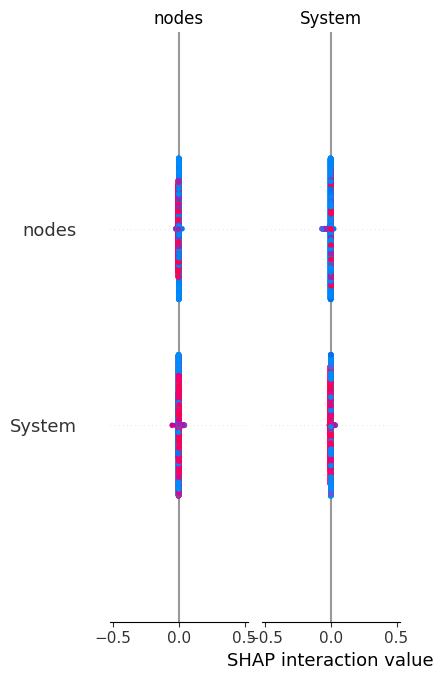

In [73]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")